The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Problem Statement: Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster. Can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.**




<font size="5">Importing libraries</font>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<font size="5">Loading the Data</font>

I have used the training data only obtained from kaggle.My predictions are based only on 891 obs and 12 features.

In [5]:
df = pd.read_csv(r'E:\Dataset\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Windelov, Mr. Einar",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


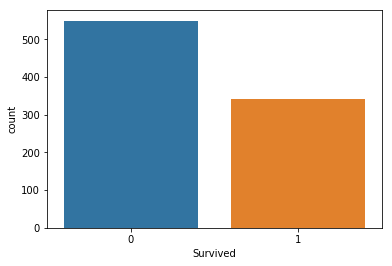

In [9]:
#sns.countplot(x = df.Survived)
sns.countplot(x = 'Survived', data = df)
plt.show()

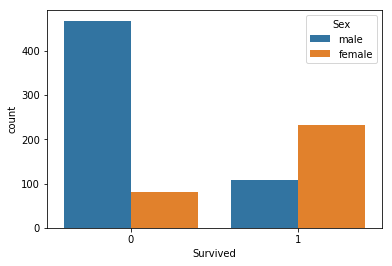

In [10]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)
plt.show()

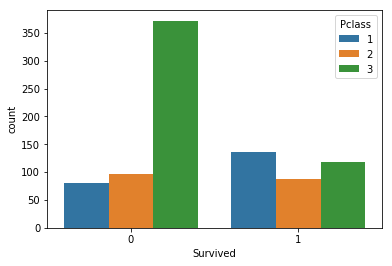

In [11]:
sns.countplot(x = 'Survived', hue = 'Pclass',  data = df)
plt.show()

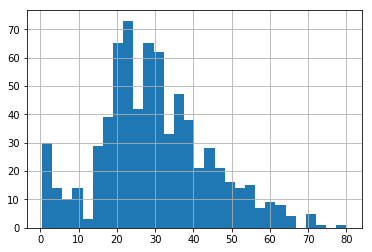

In [12]:
df.Age.hist(bins = 30)
plt.show()

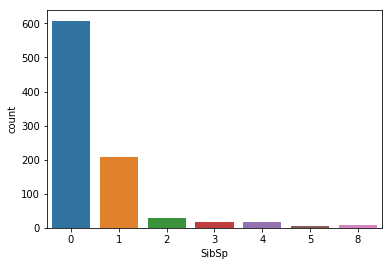

In [13]:
sns.countplot(x = 'SibSp' , data = df)
plt.show()

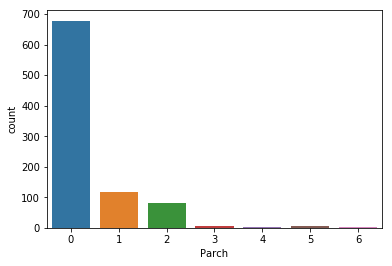

In [14]:
sns.countplot(x = 'Parch' , data = df)
plt.show()

In [15]:
df = df.drop(['Cabin', 'Name'], axis=1)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

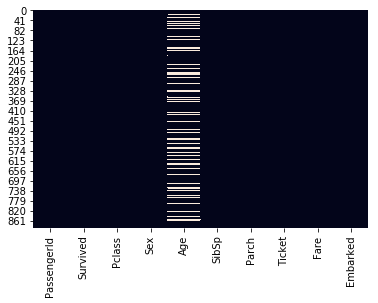

In [18]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

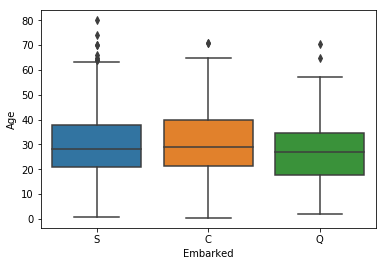

In [19]:
sns.boxplot( x = df.Embarked, y = df.Age)
plt.show()

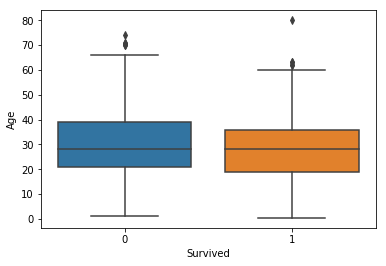

In [20]:
sns.boxplot( x = df.Survived, y = df.Age)
plt.show()

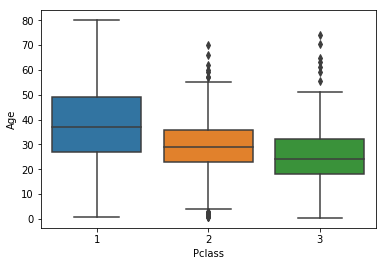

In [21]:
sns.boxplot( x = df.Pclass, y = df.Age)
plt.show()

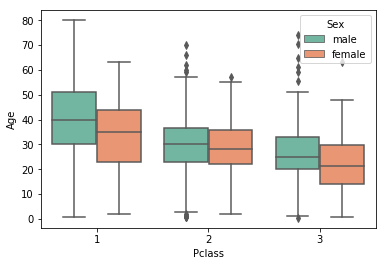

In [22]:
sns.boxplot(x = 'Pclass', y ='Age', hue = 'Sex', data = df , palette="Set2" )
plt.show()

In [23]:
for i in df['Pclass'].unique():
    for j in df['Sex'].unique():
        print("Average Age of " + str(j) + "s in Class " + str(i) + " is: ",np.round(np.mean(df[(df.Pclass == i) & (df.Sex == j)].Age)))             

Average Age of males in Class 3 is:  27.0
Average Age of females in Class 3 is:  22.0
Average Age of males in Class 1 is:  41.0
Average Age of females in Class 1 is:  35.0
Average Age of males in Class 2 is:  31.0
Average Age of females in Class 2 is:  29.0


In [24]:
for i in range(df.shape[0]):
    if np.isnan(df.Age[i]):
#        print(df.Age[i])
        df.Age[i] = np.round(np.mean(df[(df.Pclass == df.Pclass[i]) & (df.Sex == df.Sex[i])].Age))
#        print(df.Age[i])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
5,6,0,3,male,27.0,0,0,330877,8.4583,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,S
7,8,0,3,male,2.0,3,1,349909,21.0750,S
8,9,1,3,female,27.0,0,2,347742,11.1333,S
9,10,1,2,female,14.0,1,0,237736,30.0708,C


In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [27]:
df1 = df.dropna()
df1.shape

(889, 10)

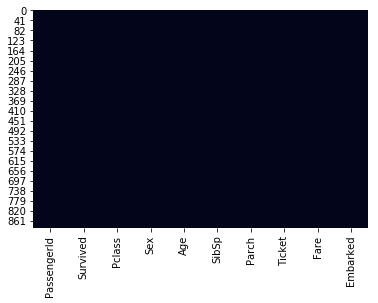

In [28]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [29]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [31]:
P_class = pd.get_dummies(df1.Pclass, drop_first = True)
Gender = pd.get_dummies(df1.Sex, drop_first = True)
Embark = pd.get_dummies(df1.Embarked, drop_first = True)
df2 = pd.concat([df1, P_class, Gender, Embark], axis = 1)
df2.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [32]:
P_class = pd.get_dummies(df1.Pclass, drop_first = True)
P_class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [33]:
df3 = df2.drop(['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Embarked'], axis = 1)
df3.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [34]:
test_size = 0.3
seed = 10
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Survived', axis=1), df3['Survived'], test_size = test_size, random_state = seed)

In [35]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
#print('classes: ',model.classes_)
#print('coefficients: ',model.coef_)
#print('intercept :',model.intercept_)

In [37]:
pred = model.predict(X_test)
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels )
print(con_mat)

[[ 64  34]
 [ 18 151]]


In [38]:
accuracy=(con_mat[0,0] + con_mat[1,1])/y_test.size
print(accuracy)
model.score(X_test, y_test)

0.8052434456928839


0.8052434456928839

In [39]:
model_1=LogisticRegression(class_weight = 'balanced')
model_1.fit(X_train,y_train)
model_1.score(X_test, y_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

In [40]:
model_2=LogisticRegression(class_weight = {0:0.81, 1:1.31})
model_2.fit(X_train,y_train)
model_2.score(X_test, y_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

In [41]:
df3.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [44]:
889/(2*549)

0.8096539162112932

In [45]:
889/(2*340)

1.3073529411764706

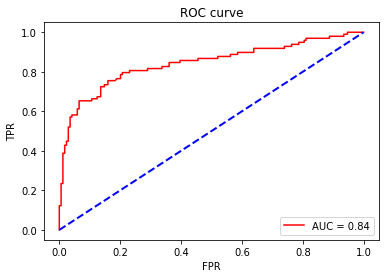

In [46]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [47]:
roc_auc_score(y_test, preds)

0.842319768143944